In [14]:
#We load in the specific data needed
import polars as pl
import numpy as np
import os
from pathlib import Path
import pandas as pd
from datetime import date
import datetime
import hvplot.polars
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import bisplrep, bisplev
from datetime import timedelta
from patsy import dmatrix
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score


data_train_p = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_train_tech_scaled_p.parquet')
data_train_c = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_train_tech_scaled_c.parquet')

data_val_p = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_val_tech_scaled_p.parquet')
data_val_c = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_val_tech_scaled_c.parquet')

tot_data_train_c = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_train_val_tech_scaled_c.parquet')
tot_data_train_p = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_train_val_tech_scaled_p.parquet')

data_test_p = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_test_tech_scaled_p_total.parquet')
data_test_c = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_test_tech_scaled_c_total.parquet')

firm_data = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Firm_variables/daily_firm_data_median_new.parquet')

data_train = pd.concat([data_train_p, data_train_c], axis=0)
data_val = pd.concat([data_val_p, data_val_c], axis=0)
data_test = pd.concat([data_test_p, data_test_c], axis=0)
data_train_tot = pd.concat([tot_data_train_p, tot_data_train_c], axis=0)

# List of columns to drop
columns_to_drop = ['trading_days_till_exp'] + list(firm_data.columns[2:]) + ['moneyness_squared', 'tau_squared', 'moneyness_tau', 'RETX', '2Y_bond',  'best_offer_option', 'best_bid_option']
# columns_to_drop = ['trading_days_till_exp']


# Drop columns from datasets if they exist
data_train = data_train.drop(columns=columns_to_drop, errors='ignore')
data_val = data_val.drop(columns=columns_to_drop, errors='ignore')
data_test = data_test.drop(columns=columns_to_drop, errors='ignore')
data_train_tot = data_train_tot.drop(columns=columns_to_drop, errors='ignore')

# Ensure that data_val and data_test have the same column order as data_train
data_val = data_val[data_train.columns]
data_test = data_test[data_train.columns]
data_train_tot = data_train_tot[data_train.columns]



In [3]:
# data_train_c = data_train[data_train['cp_flag'] == 'C']
# data_train_p = data_train[data_train['cp_flag'] == 'P']

# data_val_c = data_val[data_val['cp_flag'] == 'C']
# data_val_p = data_val[data_val['cp_flag'] == 'P']


data_train_tot_c = data_train_tot[data_train_tot['cp_flag'] == 'C']
data_train_tot_p = data_train_tot[data_train_tot['cp_flag'] == 'P']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2053.1781469028156, tolerance: 0.8531736182834999
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/

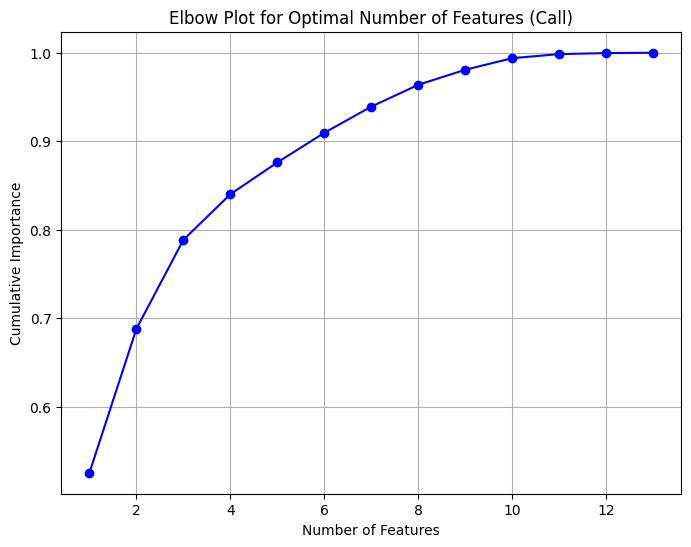

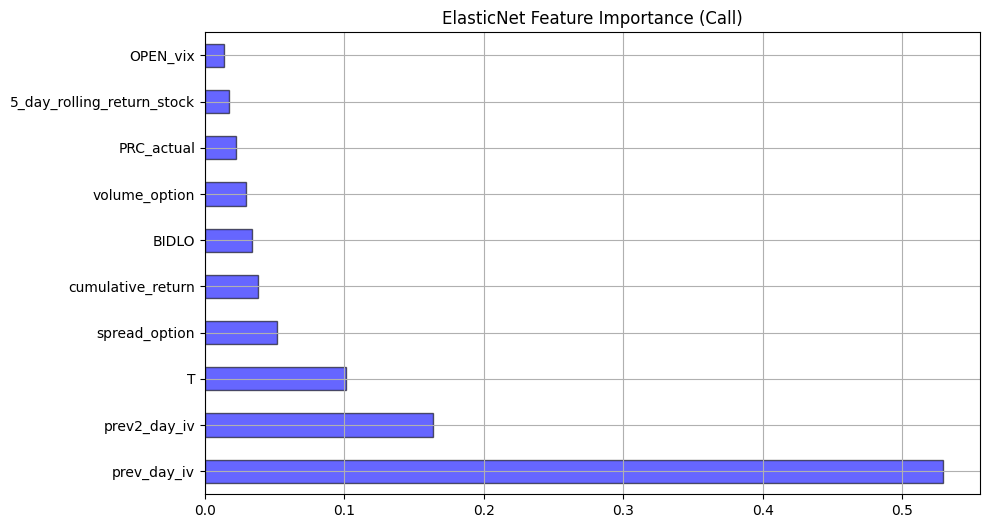

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2211.147020312535, tolerance: 0.997410337888173
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Li

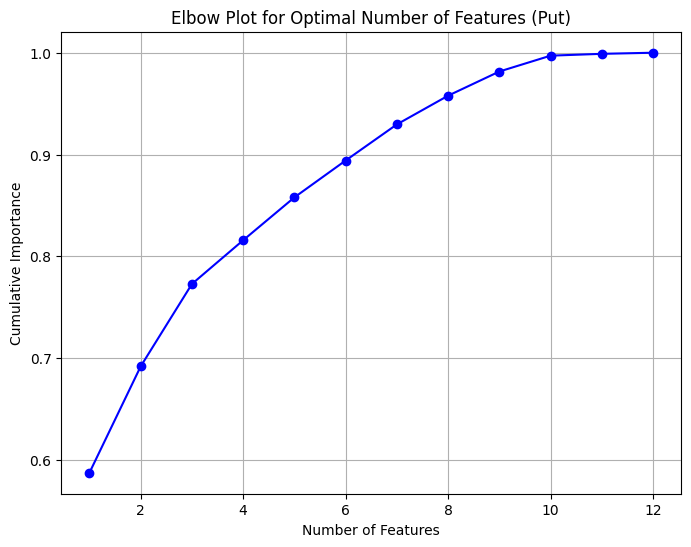

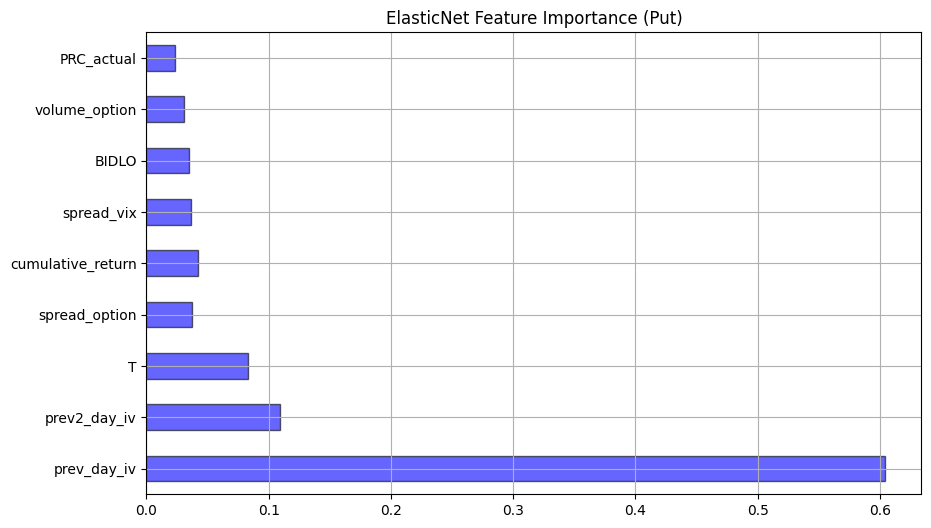

Feature Importances for Call Options:
                            Importance
prev_day_iv                   0.528999
prev2_day_iv                  0.163825
T                             0.101028
spread_option                 0.051931
cumulative_return             0.037781
BIDLO                         0.033481
volume_option                 0.029330
PRC_actual                    0.022545
5_day_rolling_return_stock    0.017245
OPEN_vix                      0.013836

Feature Importances for Put Options:
                   Importance
prev_day_iv          0.603872
prev2_day_iv         0.108886
T                    0.082898
spread_option        0.037651
cumulative_return    0.041995
spread_vix           0.036299
BIDLO                0.034486
volume_option        0.030838
PRC_actual           0.023075


In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
import logging

# Suppress font warnings
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

def feature_selection(IV, combined_data, data_type):
    """
    Perform feature selection using ElasticNet regression on the entire dataset and plot the elbow plot 
    to determine the optimal number of features.

    Parameters:
    IV (str): The name of the independent variable to predict.
    combined_data (pd.DataFrame): The dataset containing the features and the independent variable.
    data_type (str): A string indicating whether the data is for "Call" or "Put".

    Returns:
    pd.DataFrame: Sorted feature importances.
    float: The best alpha value.
    float: The best l1_ratio value.
    """
    # Separate the independent variable (target) and the features
    data_y = combined_data[IV]
    features = combined_data.drop(columns=[IV, 'date', 'Ticker', 'cp_flag'])  # Adjust as necessary

    # Define the range for alpha and l1_ratio
    alphas = np.logspace(-10, 0, 100)
    l1_ratios = np.linspace(0, 1, 10)

    # Initialize and fit the ElasticNetCV model
    enet_cv_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)
    enet_cv_model.fit(features, data_y)

    # Get the best parameters
    best_alpha = enet_cv_model.alpha_
    best_l1_ratio = enet_cv_model.l1_ratio_

    # Get the coefficients from the model
    coef = enet_cv_model.coef_

    # Identify features with non-zero coefficients
    mask = coef != 0
    selected_features = features.columns[mask]

    # Create a DataFrame for the feature importances
    features_elnet = pd.DataFrame(data=np.absolute(coef[mask]), columns=["Importance"])
    features_elnet.index = selected_features

    # Normalize the importance so it sums to 1 (from 0 to 1 scale)
    features_elnet["Importance"] = features_elnet["Importance"] / features_elnet["Importance"].sum()

    # Sort the features by normalized importance
    sorted_features_elnet = features_elnet.sort_values(by="Importance", ascending=False)

    # Calculate Cumulative Importance (used for the elbow method)
    sorted_features_elnet["Cumulative Importance"] = sorted_features_elnet["Importance"].cumsum()

    # Elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(sorted_features_elnet) + 1), sorted_features_elnet["Cumulative Importance"], marker='o', color='b')
    plt.title(f'Elbow Plot for Optimal Number of Features ({data_type})')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.grid(True)
    plt.show()

    # Manually determining the "elbow" (replace with any heuristic or observation)
    elbow_point = int(input(f"Enter the number of features to select based on the elbow plot for {data_type}: "))

    # Select the top features based on the elbow point
    sorted_features_elnet = sorted_features_elnet.head(elbow_point)

    return sorted_features_elnet, best_alpha, best_l1_ratio


def apply_elastic_net(IV, combined_data, selected_features, best_alpha, best_l1_ratio, data_type):
    """
    Apply the selected ElasticNet model to the full data using the pre-selected features 
    and extract the feature importance.

    Parameters:
    IV (str): The name of the independent variable to predict.
    combined_data (pd.DataFrame): The dataset containing the features and the independent variable.
    selected_features (pd.Index): The list of features selected by ElasticNet during training.
    best_alpha (float): The best alpha value found during training.
    best_l1_ratio (float): The best l1_ratio value found during training.
    data_type (str): A string indicating whether the data is for "Call" or "Put".

    Returns:
    np.array: The predicted values for the full set.
    pd.DataFrame: The feature importances extracted from the ElasticNet model.
    """
    # Separate the independent variable (target) and the features
    data_y = combined_data[IV]
    features = combined_data[selected_features]

    # Initialize the ElasticNet model with the best parameters from the training
    enet_model = ElasticNetCV(alphas=[best_alpha], l1_ratio=[best_l1_ratio], cv=5)

    # Fit the model to the full data
    enet_model.fit(features, data_y)

    # Predict using the full features
    predictions = enet_model.predict(features)

    # Extract coefficients and feature importance
    coef = enet_model.coef_
    feature_importance = pd.DataFrame(data=np.absolute(coef), index=selected_features, columns=['Importance'])

    # Normalize the importance to sum to 1
    feature_importance['Importance'] = feature_importance['Importance'] / feature_importance['Importance'].sum()

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    ax = feature_importance['Importance'].plot(kind='barh', color='blue', alpha=0.6, edgecolor='black', linewidth=1)
    plt.grid(True)  # Add grid
    ax.set_title(f'ElasticNet Feature Importance ({data_type})')
    ax.set_xlabel('')  # Remove x-label
    plt.show()

    return predictions, feature_importance


# Example usage with tot_train_data:

# Perform feature selection on the call dataset
sorted_features_elnet_c, best_alpha_c, best_l1_ratio_c = feature_selection('impl_volatility', data_train_tot_c, 'Call')

# Apply the ElasticNet model to the call data
predictions_c, feature_importance_c = apply_elastic_net(
    'impl_volatility', data_train_tot_c, sorted_features_elnet_c.index, best_alpha_c, best_l1_ratio_c, 'Call'
)


# Perform feature selection on the put dataset
sorted_features_elnet_p, best_alpha_p, best_l1_ratio_p = feature_selection('impl_volatility', data_train_tot_p, 'Put')

# Apply the ElasticNet model to the put data
predictions_p, feature_importance_p = apply_elastic_net(
    'impl_volatility', data_train_tot_p, sorted_features_elnet_p.index, best_alpha_p, best_l1_ratio_p, 'Put'
)

# Print the feature importances
print("Feature Importances for Call Options:")
print(feature_importance_c)

print("\nFeature Importances for Put Options:")
print(feature_importance_p)





In [5]:
print(np.logspace(-10, 0, 100))

[1.00000000e-10 1.26185688e-10 1.59228279e-10 2.00923300e-10
 2.53536449e-10 3.19926714e-10 4.03701726e-10 5.09413801e-10
 6.42807312e-10 8.11130831e-10 1.02353102e-09 1.29154967e-09
 1.62975083e-09 2.05651231e-09 2.59502421e-09 3.27454916e-09
 4.13201240e-09 5.21400829e-09 6.57933225e-09 8.30217568e-09
 1.04761575e-08 1.32194115e-08 1.66810054e-08 2.10490414e-08
 2.65608778e-08 3.35160265e-08 4.22924287e-08 5.33669923e-08
 6.73415066e-08 8.49753436e-08 1.07226722e-07 1.35304777e-07
 1.70735265e-07 2.15443469e-07 2.71858824e-07 3.43046929e-07
 4.32876128e-07 5.46227722e-07 6.89261210e-07 8.69749003e-07
 1.09749877e-06 1.38488637e-06 1.74752840e-06 2.20513074e-06
 2.78255940e-06 3.51119173e-06 4.43062146e-06 5.59081018e-06
 7.05480231e-06 8.90215085e-06 1.12332403e-05 1.41747416e-05
 1.78864953e-05 2.25701972e-05 2.84803587e-05 3.59381366e-05
 4.53487851e-05 5.72236766e-05 7.22080902e-05 9.11162756e-05
 1.14975700e-04 1.45082878e-04 1.83073828e-04 2.31012970e-04
 2.91505306e-04 3.678379

In [6]:
best_alpha_p

0.005994842503189409

In [7]:
best_l1_ratio_c

1.0

In [8]:
best_alpha_c

0.004750810162102793

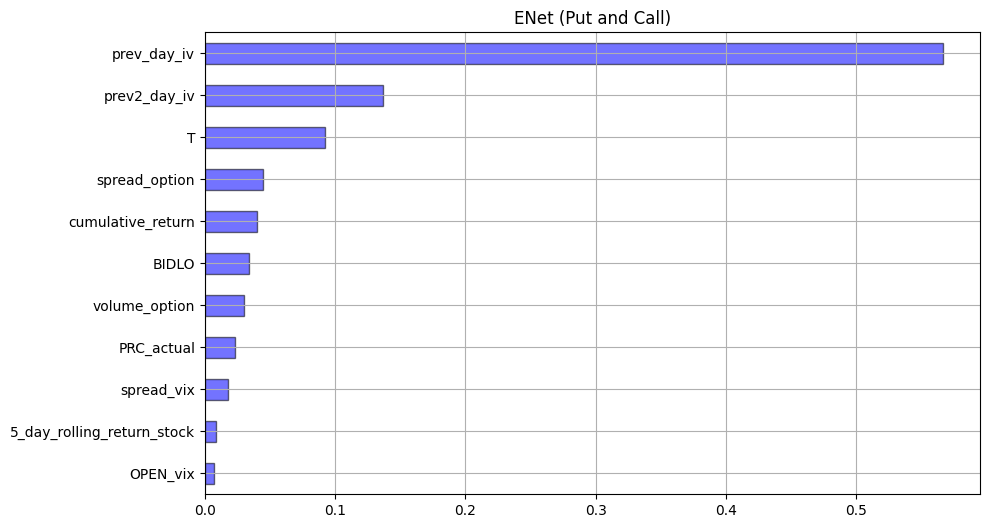

prev_day_iv                   0.566435
prev2_day_iv                  0.136356
T                             0.091963
spread_option                 0.044791
cumulative_return             0.039888
BIDLO                         0.033984
volume_option                 0.030084
PRC_actual                    0.022810
spread_vix                    0.018149
5_day_rolling_return_stock    0.008623
OPEN_vix                      0.006918
Name: Average, dtype: float64

In [9]:
# Average feature importance plot
def plot_average_feature_importance(feature_importance_call, feature_importance_put):
    """
    Create a bar plot showing the top 5 average feature importance of both Call and Put options.

    Parameters:
    feature_importance_call (pd.DataFrame): Feature importance for Call options.
    feature_importance_put (pd.DataFrame): Feature importance for Put options.
    """
    # Combine the importance of features from both Call and Put
    combined_importance = pd.concat([feature_importance_call, feature_importance_put], axis=1, keys=["Call", "Put"]).fillna(0)

    # Calculate the average importance
    combined_importance["Average"] = combined_importance.mean(axis=1)

    # Select the top 5 features based on average importance
    top_5_features = combined_importance["Average"].sort_values(ascending=False).head(15)

    # Plot the top 5 average feature importance
    plt.figure(figsize=(10, 6))
    ax = top_5_features.sort_values(ascending=True).plot(kind='barh', color='blue', alpha=0.55, edgecolor='black', linewidth=1)
    plt.grid(True)  # Add grid
    ax.set_title('ENet (Put and Call)')
    ax.set_xlabel('')  # Remove x-label
    plt.show()

    return top_5_features

# Example usage
plot_average_feature_importance(feature_importance_c, feature_importance_p)




In [11]:
from sklearn.linear_model import ElasticNet

def apply_to_test(IV, combined_data_train, combined_data_test, selected_features, best_alpha, best_l1_ratio, data_type):
    """
    Apply the ElasticNet model to the test data using the pre-selected features and best hyperparameters, 
    based on the training data.

    Parameters:
    IV (str): The name of the independent variable to predict (e.g., 'impl_volatility').
    combined_data_train (pd.DataFrame): The training dataset used to fit the model.
    combined_data_test (pd.DataFrame): The test dataset for which predictions are to be made.
    selected_features (pd.Index): The list of features selected by ElasticNet during training.
    best_alpha (float): The best alpha value found during training.
    best_l1_ratio (float): The best l1_ratio value found during training.
    data_type (str): A string indicating whether the data is for "Call" or "Put".

    Returns:
    np.array: The predicted values for the test set.
    """
    # Separate the independent variable (target) and the features for training
    data_y_train = combined_data_train[IV]
    features_train = combined_data_train[selected_features]

    # Initialize the ElasticNet model with the best parameters from the training phase
    enet_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)

    # Fit the model to the training data
    enet_model.fit(features_train, data_y_train)

    # Separate the independent variable (target) and the features for testing
    features_test = combined_data_test[selected_features]

    # Predict using the test features (no fitting on test data)
    predictions = enet_model.predict(features_test)

    return predictions

# Apply the ElasticNet model to the call test set, fitting on the training data
predictions_call_test = apply_to_test('impl_volatility', data_train_tot_c, data_test_c, sorted_features_elnet_c.index, best_alpha_c, best_l1_ratio_c, 'Call')

# Apply the ElasticNet model to the put test set, fitting on the training data
predictions_put_test = apply_to_test('impl_volatility', data_train_tot_p, data_test_p, sorted_features_elnet_p.index, best_alpha_p, best_l1_ratio_p, 'Put')

from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model_performance(actual, predicted, data_type):
    """
    Calculate and print RMSE and R² for the model predictions.

    Parameters:
    actual (pd.Series or np.array): The actual values of the independent variable.
    predicted (np.array): The predicted values from the model.
    data_type (str): The type of data being evaluated ('Call' or 'Put').

    Returns:
    rmse (float): The root mean square error.
    r2 (float): The R² score.
    """
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    
    # Calculate R² score
    r2 = r2_score(actual, predicted)
    
    print(f"\nPerformance on Test Set - {data_type} Options:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    
    return rmse, r2


# Example usage with Call options
# Evaluate model performance on the test set for Call options
rmse_call_test, r2_call_test = evaluate_model_performance(data_test_c['impl_volatility'], predictions_call_test, 'Call')

# Example usage with Put options
# Evaluate model performance on the test set for Put options
rmse_put_test, r2_put_test = evaluate_model_performance(data_test_p['impl_volatility'], predictions_put_test, 'Put')


Performance on Test Set - Call Options:
RMSE: 0.1437
R²: 0.6370

Performance on Test Set - Put Options:
RMSE: 0.1446
R²: 0.6564


In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Function to apply ElasticNet model to test data
def apply_to_test(IV, combined_data_train, combined_data_test, selected_features, best_alpha, best_l1_ratio, data_type):
    """
    Apply the ElasticNet model to the test data using the pre-selected features and best hyperparameters, 
    based on the training data.

    Parameters:
    IV (str): The name of the independent variable to predict (e.g., 'impl_volatility').
    combined_data_train (pd.DataFrame): The training dataset used to fit the model.
    combined_data_test (pd.DataFrame): The test dataset for which predictions are to be made.
    selected_features (pd.Index): The list of features selected by ElasticNet during training.
    best_alpha (float): The best alpha value found during training.
    best_l1_ratio (float): The best l1_ratio value found during training.
    data_type (str): A string indicating whether the data is for "Call" or "Put".

    Returns:
    np.array: The predicted values for the test set.
    """
    # Separate the independent variable (target) and the features for training
    data_y_train = combined_data_train[IV]
    features_train = combined_data_train[selected_features]

    # Initialize the ElasticNet model with the best parameters from the training phase
    enet_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)

    # Fit the model to the training data
    enet_model.fit(features_train, data_y_train)

    # Separate the independent variable (target) and the features for testing
    features_test = combined_data_test[selected_features]

    # Predict using the test features (no fitting on test data)
    predictions = enet_model.predict(features_test)

    return predictions

# Function to evaluate model performance
def evaluate_model_performance(actual, predicted, data_type):
    """
    Calculate and print RMSE and R² for the model predictions.

    Parameters:
    actual (pd.Series or np.array): The actual values of the independent variable.
    predicted (np.array): The predicted values from the model.
    data_type (str): The type of data being evaluated ('Call' or 'Put').

    Returns:
    rmse (float): The root mean square error.
    r2 (float): The R² score.
    """
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    
    # Calculate R² score
    r2 = r2_score(actual, predicted)
    
    print(f"\nPerformance on Test Set - {data_type} Options:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    
    return rmse, r2

# Function to calculate prediction errors
def get_prediction_errors(actual, predicted):
    """
    Compute the prediction errors between actual and predicted values.
    
    Parameters:
    actual (pd.Series or np.array): The actual values of the independent variable.
    predicted (np.array): The predicted values from the model.
    
    Returns:
    np.array: The error differences.
    """
    return actual - predicted

# Function to calculate Newey-West standard error
def newey_west_standard_error(errors, lag=1):
    """
    Computes the Newey-West standard error for the series of prediction errors.
    
    Parameters:
    - errors: Array-like of prediction errors
    - lag: Maximum lag to use for the Newey-West estimator (default is 1)
    
    Returns:
    - Newey-West standard error of the prediction errors
    """
    X = np.ones(len(errors))  # Constant term
    ols_model = sm.OLS(errors, X).fit(cov_type='HAC', cov_kwds={'maxlags': lag})
    nw_std_error = ols_model.bse[0]
    return nw_std_error

# Step 1: Apply the ElasticNet model to the call test set, fitting on the training data
predictions_call_test = apply_to_test('impl_volatility', data_train_tot_c, data_test_c, sorted_features_elnet_c.index, best_alpha_c, best_l1_ratio_c, 'Call')

# Step 2: Apply the ElasticNet model to the put test set, fitting on the training data
predictions_put_test = apply_to_test('impl_volatility', data_train_tot_p, data_test_p, sorted_features_elnet_p.index, best_alpha_p, best_l1_ratio_p, 'Put')

# Step 3: Evaluate model performance for Call and Put options
rmse_call_test, r2_call_test = evaluate_model_performance(data_test_c['impl_volatility'], predictions_call_test, 'Call')
rmse_put_test, r2_put_test = evaluate_model_performance(data_test_p['impl_volatility'], predictions_put_test, 'Put')

# Step 4: Gather prediction errors for Call and Put options
call_errors_enet = get_prediction_errors(data_test_c['impl_volatility'], predictions_call_test)
put_errors_enet = get_prediction_errors(data_test_p['impl_volatility'], predictions_put_test)

# Step 5: Calculate the Newey-West standard error for each set of errors
nw_std_error_call = newey_west_standard_error(call_errors_enet, lag=1)
nw_std_error_put = newey_west_standard_error(put_errors_enet, lag=1)

# Step 6: Ensure both error lists have the same length by padding the shorter one with zeros
max_length = max(len(call_errors_enet), len(put_errors_enet))

call_errors_enet_padded = np.pad(call_errors_enet, (0, max_length - len(call_errors_enet)), 'constant', constant_values=0)
put_errors_enet_padded = np.pad(put_errors_enet, (0, max_length - len(put_errors_enet)), 'constant', constant_values=0)

# Step 7: Save the errors and Newey-West standard errors to a CSV file
enet_test_data = pd.DataFrame({
    'Call Errors': call_errors_enet_padded,
    'Put Errors': put_errors_enet_padded,
    'Call Newey-West Std Error': [nw_std_error_call] * max_length,
    'Put Newey-West Std Error': [nw_std_error_put] * max_length
})

# Specify the file path for saving the errors and Newey-West standard errors
file_path = '/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Notebooks/performence_evaluation/dm_test_errors_enet.csv'

# Save the DataFrame to a new CSV file
enet_test_data.to_csv(file_path, index=False)

print(f"ElasticNet model test errors and Newey-West statistics saved to {file_path}")




Performance on Test Set - Call Options:
RMSE: 0.1437
R²: 0.6370

Performance on Test Set - Put Options:
RMSE: 0.1446
R²: 0.6564


/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_38479/2298841198.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nw_std_error = ols_model.bse[0]


ElasticNet model test errors and Newey-West statistics saved to /Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Notebooks/performence_evaluation/dm_test_errors_enet.csv


In [13]:
call_errors_enet

0        0.084066
1        0.145712
2        0.085091
3        0.106858
4        0.103999
           ...   
36347   -0.166598
36348   -0.168737
36349   -0.158756
36350   -0.161668
36351   -0.151572
Name: impl_volatility, Length: 36352, dtype: float64

# Validation set selection based on selection procedure

In [165]:
# def apply_to_validation(IV, combined_data_val, selected_features, best_alpha, best_l1_ratio):
#     """
#     Apply the selected ElasticNet model to the validation data using the pre-selected features.

#     Parameters:
#     IV (str): The name of the independent variable to predict.
#     combined_data_val (pd.DataFrame): The validation dataset containing the features and the independent variable.
#     selected_features (pd.Index): The list of features selected by ElasticNet during training.
#     best_alpha (float): The best alpha value found during training.
#     best_l1_ratio (float): The best l1_ratio value found during training.

#     Returns:
#     pd.Series: The predicted values for the validation set.
#     """
#     # Separate the independent variable (target) and the features
#     data_y_val = combined_data_val[IV]
#     features_val = combined_data_val[selected_features]

#     # Initialize the ElasticNet model with the best parameters from the training
#     enet_model = ElasticNetCV(alphas=[best_alpha], l1_ratio=[best_l1_ratio], cv=5)

#     # Fit the model to the validation data
#     enet_model.fit(features_val, data_y_val)

#     # Predict using the validation features
#     predictions = enet_model.predict(features_val)

#     return predictions


# # Assuming you have your validation data sets standardized and loaded as `data_val_c` and `data_val_p`:

# # Apply to validation set for calls
# predictions_call_val = apply_to_validation('impl_volatility', data_val_c, sorted_features_elnet_call.index, best_alpha_call, best_l1_ratio_call)

# # Apply to validation set for puts
# predictions_put_val = apply_to_validation('impl_volatility', data_val_p, sorted_features_elnet_put.index, best_alpha_put, best_l1_ratio_put)

# # Now you can compare the predicted values against the actual values in your validation set.


def evaluate_model_performance(actual, predicted):
    """
    Calculate and print RMSE and R² for the model predictions.

    Parameters:
    actual (pd.Series or np.array): The actual values of the independent variable.
    predicted (np.array): The predicted values from the model.

    Returns:
    rmse (float): The root mean square error.
    r2 (float): The R² score.
    """
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    
    # Calculate R² score
    r2 = r2_score(actual, predicted)
    
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    
    return rmse, r2

# Evaluate model performance for Call options
print("Performance on Validation Set - Call Options:")
rmse_call, r2_call = evaluate_model_performance(data_train_tot_c['impl_volatility'], predictions_c)

# Evaluate model performance for Put options
print("\nPerformance on Validation Set - Put Options:")
# rmse_put, r2_put = evaluate_model_performance(data_val_p['impl_volatility'], predictions_put_val)

Performance on Validation Set - Call Options:
RMSE: 0.1950
R²: 0.7179

Performance on Validation Set - Put Options:


In [166]:
# sorted_features_elnet_put.index

In [167]:
# Step 1: Calculate the mean and standard deviation of impl_volatility from the training data
call_iv_train_mean = data_train_c['impl_volatility'].mean()
call_iv_train_std = data_train_c['impl_volatility'].std()

put_iv_train_mean = data_train_p['impl_volatility'].mean()
put_iv_train_std = data_train_p['impl_volatility'].std()


In [168]:
# def inverse_transform_predictions(predicted, mean, std):
#     """
#     Inverse transform the standardized predictions back to the original scale.

#     Parameters:
#     predicted (np.array): The predicted values from the standardized data.
#     mean (float): The mean of the target variable in the training data.
#     std (float): The standard deviation of the target variable in the training data.

#     Returns:
#     np.array: The inverse transformed predictions.
#     """
#     return predicted * std + mean

def apply_to_test(IV, combined_data_test, selected_features, best_alpha, best_l1_ratio):
    """
    Apply the ElasticNet model to the test data using the pre-selected features and best hyperparameters.

    Parameters:
    IV (str): The name of the independent variable to predict (e.g., 'impl_volatility').
    combined_data_test (pd.DataFrame): The test dataset containing the features and the independent variable.
    selected_features (pd.Index): The list of features selected by ElasticNet during training.
    best_alpha (float): The best alpha value found during training.
    best_l1_ratio (float): The best l1_ratio value found during training.

    Returns:
    np.array: The predicted values for the test set.
    """
    # Separate the independent variable (target) and the features
    data_y_test = combined_data_test[IV]
    features_test = combined_data_test[selected_features]

    # Initialize the ElasticNet model with the best parameters from the training phase
    enet_model = ElasticNetCV(alphas=[best_alpha], l1_ratio=[best_l1_ratio], cv=5)

    # Fit the model to the test data
    enet_model.fit(features_test, data_y_test)

    # Predict using the test features
    predictions = enet_model.predict(features_test)

    return predictions


# Step 3: Predict on the validation and test sets and inverse-transform the predictions

# For Calls
# predictions_call_val = apply_to_validation('impl_volatility', data_val_c, sorted_features_elnet_call.index, best_alpha_call, best_l1_ratio_call)
predictions_call_test = apply_to_test('impl_volatility', data_test_c, sorted_features_elnet_call.index, best_alpha_call, best_l1_ratio_call)

# # Inverse transform the predictions for Call options using the training set's mean and std
# predictions_call_val_inverse = inverse_transform_predictions(predictions_call_val, call_iv_train_mean, call_iv_train_std)
# predictions_call_test_inverse = inverse_transform_predictions(predictions_call_test, call_iv_train_mean, call_iv_train_std)

# For Puts
# predictions_put_val = apply_to_validation('impl_volatility', data_val_p, sorted_features_elnet_put.index, best_alpha_put, best_l1_ratio_put)
predictions_put_test = apply_to_test('impl_volatility', data_test_p, sorted_features_elnet_put.index, best_alpha_put, best_l1_ratio_put)

# Inverse transform the predictions for Put options using the training set's mean and std
# predictions_put_val_inverse = inverse_transform_predictions(predictions_put_val, put_iv_train_mean, put_iv_train_std)
# predictions_put_test_inverse = inverse_transform_predictions(predictions_put_test, put_iv_train_mean, put_iv_train_std)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.1629600181025, tolerance: 0.18206298646714542
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/

In [169]:
# Evaluate model performance on the validation set for Call options
print(f"\nNumber of features selected for Call options: {len(sorted_features_elnet_call.index)}")
print("Performance on Validation Set - Call Options:")
rmse_call_val, r2_call_val = evaluate_model_performance(data_val_c['impl_volatility'], predictions_call_val)

# Evaluate model performance on the test set for Call options
print("\nPerformance on Test Set - Call Options:")
rmse_call_test, r2_call_test = evaluate_model_performance(data_test_c['impl_volatility'], predictions_call_test)

# Evaluate model performance on the validation set for Put options
print(f"\nNumber of features selected for Put options: {len(sorted_features_elnet_put.index)}")
print("\nPerformance on Validation Set - Put Options:")
rmse_put_val, r2_put_val = evaluate_model_performance(data_val_p['impl_volatility'], predictions_put_val)

# Evaluate model performance on the test set for Put options
print("\nPerformance on Test Set - Put Options:")
rmse_put_test, r2_put_test = evaluate_model_performance(data_test_p['impl_volatility'], predictions_put_test)




Number of features selected for Call options: 6
Performance on Validation Set - Call Options:
RMSE: 0.2280
R²: 0.6638

Performance on Test Set - Call Options:
RMSE: 0.1456
R²: 0.6273

Number of features selected for Put options: 5

Performance on Validation Set - Put Options:
RMSE: 0.2173
R²: 0.7363

Performance on Test Set - Put Options:
RMSE: 0.1442
R²: 0.6586


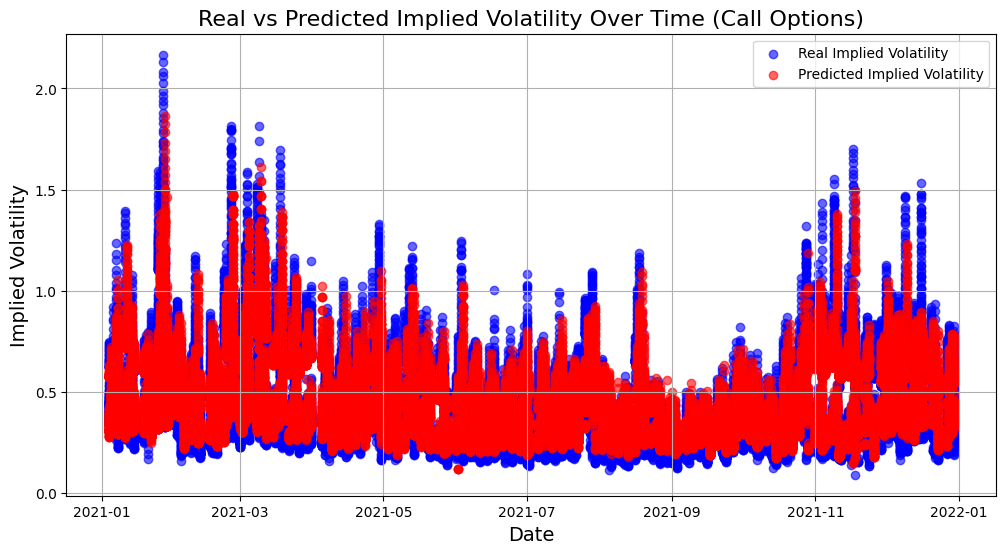

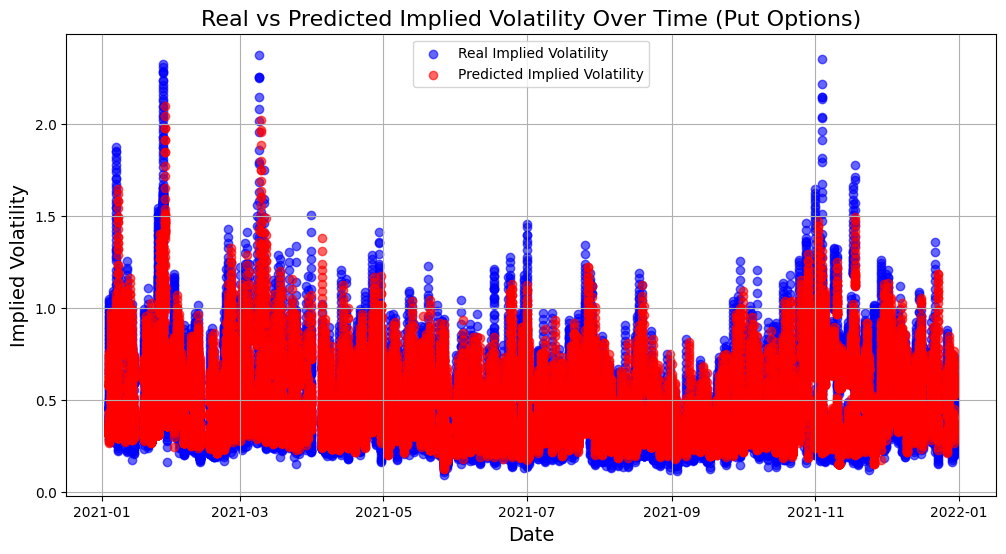

In [170]:
import matplotlib.pyplot as plt

def plot_real_vs_predicted(test_data, real_values, predicted_values, title):
    """
    Plot Real vs Predicted Implied Volatility over time.

    Parameters:
    test_data (pd.DataFrame): The test dataset containing the date information.
    real_values (np.array or pd.Series): The real implied volatility values.
    predicted_values (np.array or pd.Series): The predicted implied volatility values.
    title (str): The title for the plot.
    """
    plt.figure(figsize=(12, 6))
    
    # Scatter plot for Real Implied Volatility
    plt.scatter(test_data['date'], real_values, label='Real Implied Volatility', color='blue', alpha=0.6)
    
    # Scatter plot for Predicted Implied Volatility
    plt.scatter(test_data['date'], predicted_values, label='Predicted Implied Volatility', color='red', alpha=0.6)
    
    # Labels and title
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Implied Volatility', fontsize=14)
    plt.title(f'Real vs Predicted Implied Volatility Over Time ({title})', fontsize=16)
    
    # Add a legend
    plt.legend()
    
    # Grid for better visualization
    plt.grid(True)
    
    # Display the plot
    plt.show()



# Plot for Call options test set
plot_real_vs_predicted(data_test_c, data_test_c['impl_volatility'], predictions_call_test, "Call Options")

# Plot for Put options test set
plot_real_vs_predicted(data_test_p, data_test_p['impl_volatility'], predictions_put_test, "Put Options")
